# VIDEO GAME SALES ANALYSIS

### OBJECTIVE

1. Which titles sold the most worldwide?

2. Which year had the highest sales? Has the industry grown over time?

3. Do any consoles seem to specialize in a particular genre?

4. What titles are popular in one region but flop in another?

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats.mstats import winsorize 

### Dataset Loading & Understanding

In [197]:
# Loading the meta dataset with the description of each attribute of the main dataset
columns = pd.read_csv('data-dictionary.csv')

In [198]:
# Prining the meta dataset 
columns

,Field,Description
0,img,URL slug for the box art at vgchartz.com
1,title,Game title
2,console,Console the game was released for
3,genre,Genre of the game
4,publisher,Publisher of the game
5,developer,Developer of the game
6,critic_score,Metacritic score (out of 10)
7,total_sales,Global sales of copies in millions
8,na_sales,North American sales of copies in millions
9,jp_sales,Japanese sales of copies in millions


In [199]:
# Loading the video game dataset
vg_data = pd.read_csv('charts.csv')

In [200]:
# Printing the video game dataset
vg_data.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [201]:
# Finding the number of rows and columns 
vg_data.shape

(64016, 14)

In [202]:
# Descriptive statistics 
vg_data.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [203]:
# Summary
vg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


### Data Wrangling 

In [205]:
# Finding the number of missing values for each column 
missing_values = vg_data.isnull().sum()
print(missing_values)

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64


In [206]:
# Dropping duplicate records 
vg_data.drop_duplicates()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


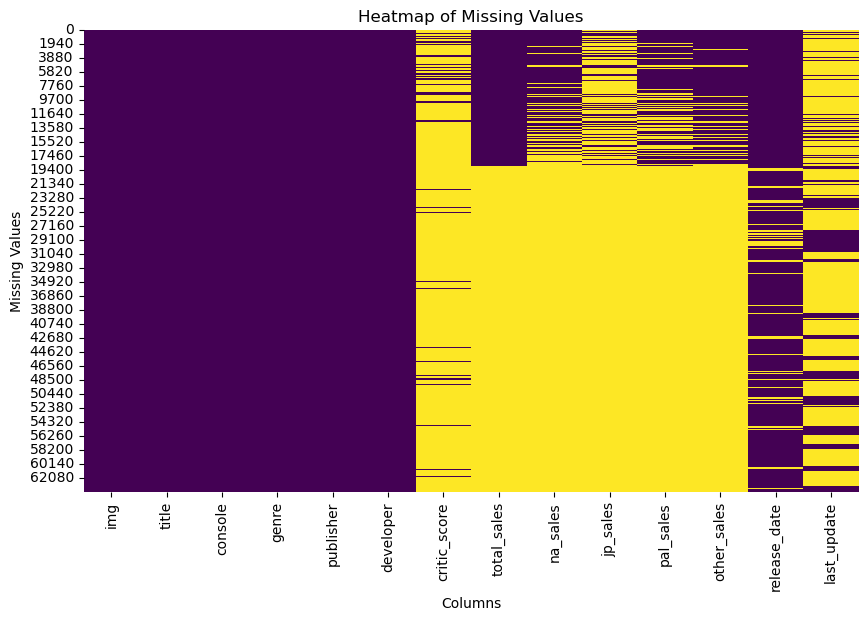

In [207]:
# Heatmap for missing values

plt.figure(figsize=(10, 6))
sns.heatmap(vg_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.show()

In [208]:
# Dropping columns that aren't required for our analysis

vg_data.drop(columns = ['developer','img','last_update','critic_score','publisher'],inplace = True)

In [209]:
# Making a copy of the dataframe for future analysis

vg_data_duplicate = vg_data.copy()

In [210]:
# Printing updated dataframe 

vg_data.head()

,title,console,genre,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,Grand Theft Auto V,PS3,Action,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,Grand Theft Auto V,X360,Action,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,15.09,6.18,0.41,6.05,2.44,2015-11-06


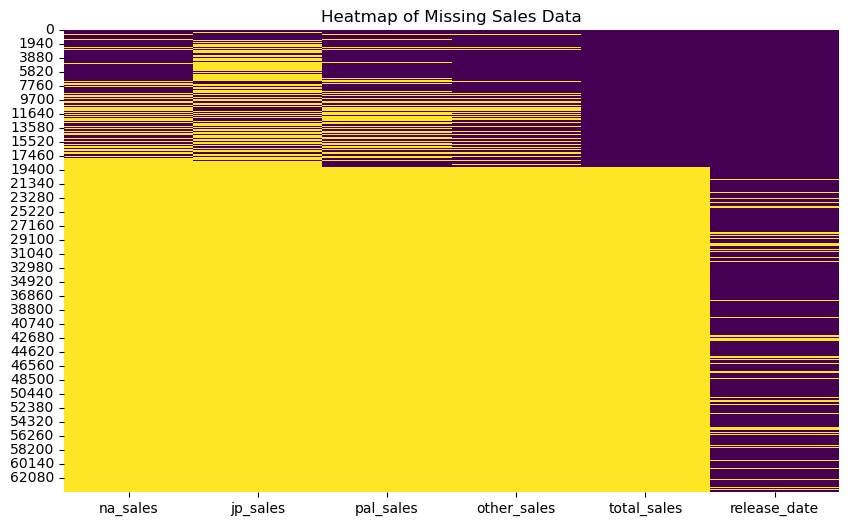

In [211]:
# Plotting heatmap for attributes that require cleaning 

plt.figure(figsize=(10, 6))
sns.heatmap(vg_data[['na_sales', 'jp_sales', 'pal_sales', 'other_sales','total_sales','release_date']].isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Sales Data')
plt.show()

In [212]:
# Find the index where missing values start
missing_starts = vg_data[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].isnull().all(axis=1).idxmax()
print(f"Missing values start at index: {missing_starts}")

# Check the percentage of missing values after this index
missing_data_after = vg_data.loc[missing_starts:, ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].isnull().sum()
total_records_after = vg_data.loc[missing_starts:, ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].shape[0]

missing_percentage_after = (missing_data_after / total_records_after) * 100
print(f"Percentage of missing values after the first missing value row:\n{missing_percentage_after}")


Missing values start at index: 18922
Percentage of missing values after the first missing value row:
na_sales       100.0
jp_sales       100.0
pal_sales      100.0
other_sales    100.0
dtype: float64


In [213]:
# Removing all records post 18922 

vg_data = vg_data.loc[:18922]

# Drop rows with missing values in 'release_date'
vg_data = vg_data.dropna(subset=['release_date'])

In [214]:
# Verifying the updated dataframe

vg_data.shape

(18833, 9)

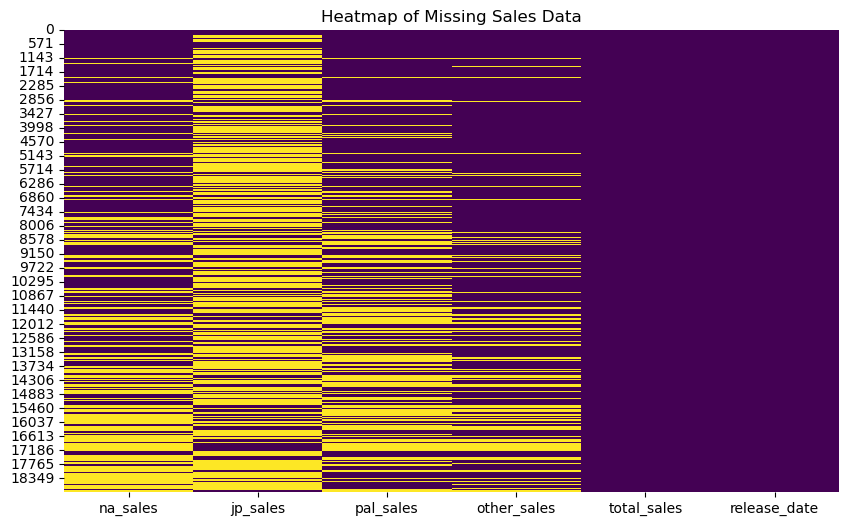

In [215]:
# Plotting heatmap for missing values in the updated dataframe

plt.figure(figsize=(10, 6))
sns.heatmap(vg_data[['na_sales', 'jp_sales', 'pal_sales', 'other_sales','total_sales','release_date']].isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Sales Data')
plt.show()

In [216]:
from sklearn.impute import SimpleImputer

# Median Imputation
imputer_median = SimpleImputer(strategy='median')
vg_data[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']] = imputer_median.fit_transform(vg_data[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']])

In [217]:
# Update 'total_sales' after imputing missing values
vg_data['total_sales'] = (vg_data['na_sales'] + vg_data['jp_sales'] +
                          vg_data['pal_sales'] + vg_data['other_sales'])

# Check for missing values after imputation
missing_values_after = vg_data[['na_sales', 'jp_sales', 'pal_sales', 'other_sales','total_sales','release_date']].isnull().sum()
print(f"Missing values after imputation:\n{missing_values_after}")

Missing values after imputation:
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
total_sales     0
release_date    0
dtype: int64


In [218]:
# Convert 'release_date' to datetime
vg_data['release_date'] = pd.to_datetime(vg_data['release_date'])

# Extracting year from 'release_date'
vg_data['year'] = vg_data['release_date'].dt.year

In [219]:
vg_data.head()

,title,console,genre,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,year
0,Grand Theft Auto V,PS3,Action,20.33,6.37,0.99,9.85,3.12,2013-09-17,2013
1,Grand Theft Auto V,PS4,Action,19.39,6.06,0.60,9.71,3.02,2014-11-18,2014
2,Grand Theft Auto: Vice City,PS2,Action,16.15,8.41,0.47,5.49,1.78,2002-10-28,2002
3,Grand Theft Auto V,X360,Action,15.87,9.06,0.06,5.33,1.42,2013-09-17,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,15.08,6.18,0.41,6.05,2.44,2015-11-06,2015


### Exploratory Data Analysis

1. Which titles sold the most worldwide?

In [222]:
top_sales = vg_data.sort_values(by='total_sales',ascending = False).head(10)
top_sales

,title,console,genre,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,year
0,Grand Theft Auto V,PS3,Action,20.33,6.37,0.99,9.85,3.12,2013-09-17,2013
1,Grand Theft Auto V,PS4,Action,19.39,6.06,0.60,9.71,3.02,2014-11-18,2014
2,Grand Theft Auto: Vice City,PS2,Action,16.15,8.41,0.47,5.49,1.78,2002-10-28,2002
3,Grand Theft Auto V,X360,Action,15.87,9.06,0.06,5.33,1.42,2013-09-17,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,15.08,6.18,0.41,6.05,2.44,2015-11-06,2015
5,Call of Duty: Modern Warfare 3,X360,Shooter,14.82,9.07,0.13,4.29,1.33,2011-11-08,2011
6,Call of Duty: Black Ops,X360,Shooter,14.74,9.76,0.11,3.73,1.14,2010-11-09,2010
7,Red Dead Redemption 2,PS4,Action-Adventure,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018
8,Call of Duty: Black Ops II,X360,Shooter,13.86,8.27,0.07,4.32,1.20,2012-11-13,2012
9,Call of Duty: Black Ops II,PS3,Shooter,13.80,4.99,0.65,5.88,2.28,2012-11-13,2012


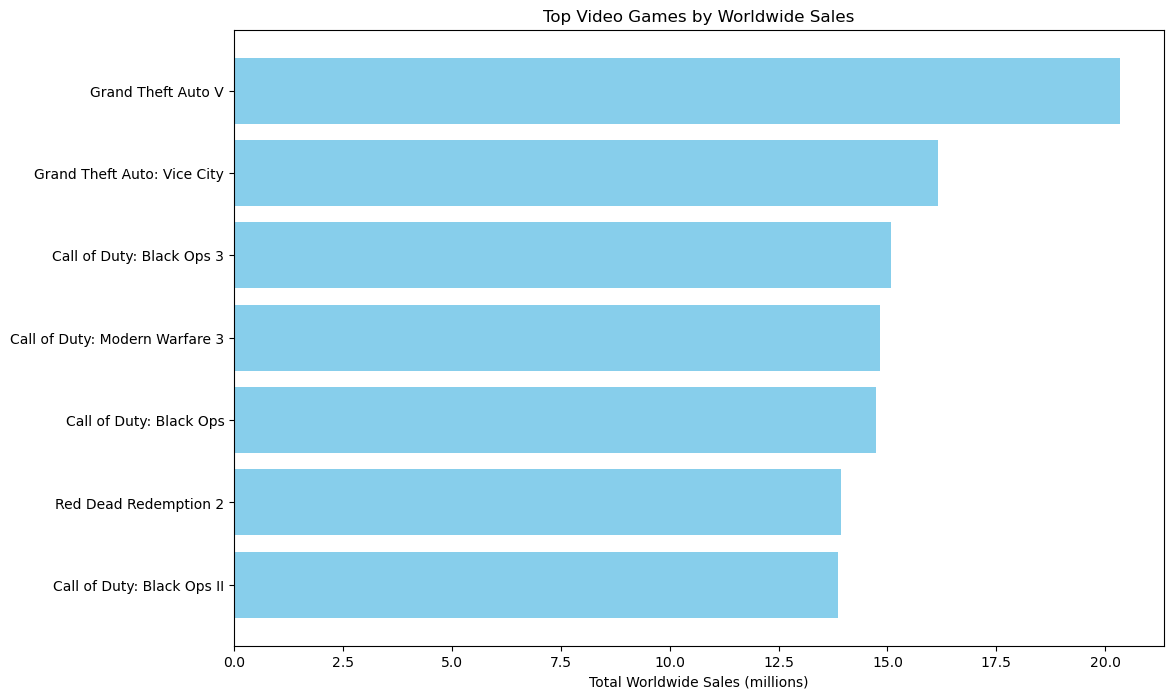

In [223]:
# Top titles

plt.figure(figsize=(12, 8))
plt.barh(top_sales['title'], top_sales['total_sales'], color='skyblue')
plt.xlabel('Total Worldwide Sales (millions)')
plt.title('Top Video Games by Worldwide Sales')
plt.gca().invert_yaxis()
plt.show()

2. Which year had the highest sales? Has the industry grown over time?

In [225]:
# Aggregating total sales by year 

sales_by_year = vg_data.groupby('year')['total_sales'].sum().reset_index()

In [226]:
# Finding the year with highest sales

year_with_highest_sales = sales_by_year[sales_by_year['total_sales'] == sales_by_year['total_sales'].max()]
year_with_highest_sales

,year,total_sales
31,2008,676.47


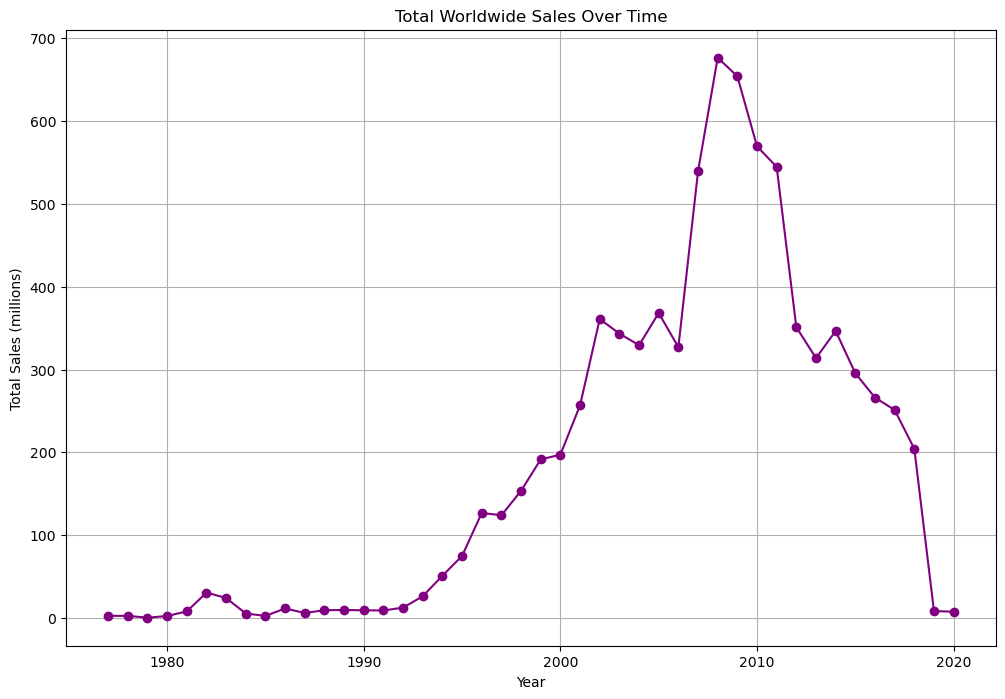

In [227]:
# Visualizing sales over time 

plt.figure(figsize=(12, 8))
plt.plot(sales_by_year['year'], sales_by_year['total_sales'], marker='o', linestyle='-', color='purple')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.title('Total Worldwide Sales Over Time')
plt.grid(True)
plt.show()

3. Do any consoles seem to specialize in a particular genre?

In [258]:
# Getting the top 10 consoles 

top_consoles = vg_data_duplicate['console'].value_counts().head(10).index
top_consoles

Index(['PC', 'PS2', 'DS', 'PS4', 'PS', 'NS', 'XBL', 'PSN', 'XOne', 'PS3'], dtype='object', name='console')

In [268]:
# Getting the corresponding genres of the top consoles 

top_consoles_data = vg_data_duplicate[vg_data_duplicate['console'].isin(top_consoles)]
console_genre = top_consoles_data.groupby(['console', 'genre']).size()

In [276]:
console_genre

console  genre           
DS       Action              369
         Action-Adventure      5
         Adventure           409
         Fighting             44
         Misc                853
                            ... 
XOne     Shooter             201
         Simulation           81
         Sports              137
         Strategy             71
         Visual Novel         13
Length: 173, dtype: int64

In [278]:
# Convert Series to DataFrame
console_genre_df = console_genre.reset_index(name='count')

# Pivot the DataFrame to create a matrix format
heatmap_data = console_genre_df.pivot(index='genre', columns='console', values='count')

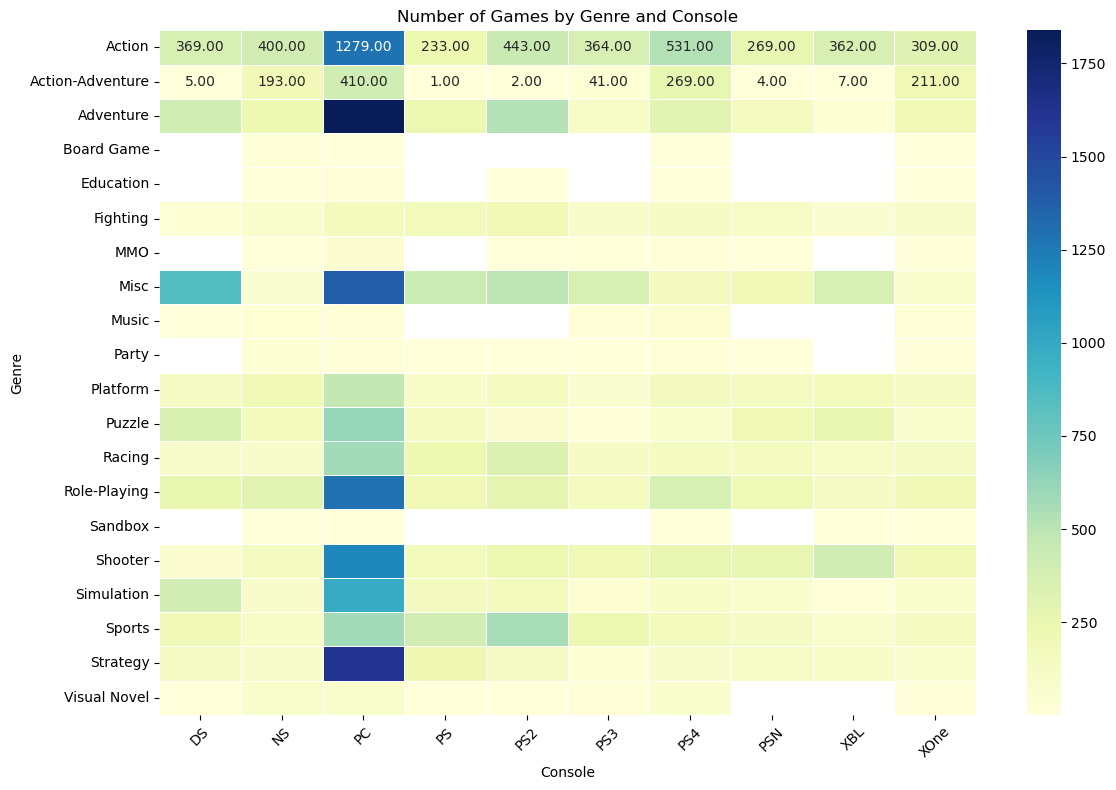

In [286]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.2f', cbar=True)
plt.title('Number of Games by Genre and Console')
plt.xlabel('Console')
plt.ylabel('Genre')
plt.xticks(rotation=45) 
plt.yticks(rotation=0) 
plt.tight_layout()  
plt.show()

4. What titles are popular in one region but flop in another?

In [303]:
# Total sales of each title in each region 

sales_by_title_region = vg_data.groupby('title').agg({
    'na_sales': 'sum',
    'jp_sales': 'sum',
    'pal_sales': 'sum',
    'other_sales': 'sum'
}).reset_index()

sales_by_title_region

,title,na_sales,jp_sales,pal_sales,other_sales
0,'98 Koshien,0.15,0.12,0.10,0.03
1,.hack//G.U. Last Recode,0.10,0.08,0.04,0.03
2,.hack//G.U. Vol.2//Reminisce,0.11,0.04,0.09,0.03
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.12,0.16,0.04,0.01
4,.hack//G.U. Vol.3//Redemption,0.12,0.17,0.04,0.01
...,...,...,...,...,...
12931,thinkSMART Kids 8+,0.01,0.04,0.04,0.00
12932,thinkSMART: Chess for Kids,0.01,0.04,0.04,0.00
12933,uDraw Studio,1.65,0.04,0.58,0.21
12934,uDraw Studio: Instant Artist,0.19,0.12,0.10,0.02


In [305]:
# Calculate average sales for each region

avg_sales = {
    'na_sales': sales_by_title_region['na_sales'].mean(),
    'jp_sales': sales_by_title_region['jp_sales'].mean(),
    'pal_sales': sales_by_title_region['pal_sales'].mean(),
    'other_sales': sales_by_title_region['other_sales'].mean()
}

# Determine popular and flop titles

sales_by_title_region['na_popular'] = sales_by_title_region['na_sales'] > avg_sales['na_sales']
sales_by_title_region['jp_popular'] = sales_by_title_region['jp_sales'] > avg_sales['jp_sales']
sales_by_title_region['pal_popular'] = sales_by_title_region['pal_sales'] > avg_sales['pal_sales']
sales_by_title_region['other_popular'] = sales_by_title_region['other_sales'] > avg_sales['other_sales']

In [307]:
# Printing the dataframe

sales_by_title_region

,title,na_sales,jp_sales,pal_sales,other_sales,na_popular,jp_popular,pal_popular,other_popular
0,'98 Koshien,0.15,0.12,0.10,0.03,False,True,False,False
1,.hack//G.U. Last Recode,0.10,0.08,0.04,0.03,False,False,False,False
2,.hack//G.U. Vol.2//Reminisce,0.11,0.04,0.09,0.03,False,False,False,False
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.12,0.16,0.04,0.01,False,True,False,False
4,.hack//G.U. Vol.3//Redemption,0.12,0.17,0.04,0.01,False,True,False,False
...,...,...,...,...,...,...,...,...,...
12931,thinkSMART Kids 8+,0.01,0.04,0.04,0.00,False,False,False,False
12932,thinkSMART: Chess for Kids,0.01,0.04,0.04,0.00,False,False,False,False
12933,uDraw Studio,1.65,0.04,0.58,0.21,True,False,True,True
12934,uDraw Studio: Instant Artist,0.19,0.12,0.10,0.02,False,True,False,False
